**Association rule mining**

Association rule minining is a technique that has been employed for the purpose of discovering  relationship between variables in a big dataset. In this example we are going to analyse the association of drugs solds in a particular pharmacy. The rules indicate to us the drugs that are related to each other.

Import Libraries and data load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/capstone/DekutEngageCapstone/drugs.csv')


In [4]:
data.head()

,Transaction_ID,Amoxicillin,Paracetamol,Metronidazole,Ibuprofen,Cotrimoxazole
0,1,0,1,0,0,0
1,2,1,0,0,0,1
2,3,0,0,0,0,1
3,4,0,1,1,1,0
4,5,1,0,1,1,1


In [5]:
data.describe()

,Transaction_ID,Amoxicillin,Paracetamol,Metronidazole,Ibuprofen,Cotrimoxazole
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,0.473333,0.500000,0.493333,0.536667,0.486667
std,86.746758,0.500123,0.500835,0.500791,0.499487,0.500657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.500000,0.000000,0.500000,0.000000,1.000000,0.000000
75%,225.250000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Transaction_ID  300 non-null    int64
 1   Amoxicillin     300 non-null    int64
 2   Paracetamol     300 non-null    int64
 3   Metronidazole   300 non-null    int64
 4   Ibuprofen       300 non-null    int64
 5   Cotrimoxazole   300 non-null    int64
dtypes: int64(6)
memory usage: 14.2 KB


In [7]:
data.isnull().sum()

,0
Transaction_ID,0
Amoxicillin,0
Paracetamol,0
Metronidazole,0
Ibuprofen,0
Cotrimoxazole,0


In [20]:
#importing the necessary classes
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

# Transform the dataset: 1 -> True, 0 -> False
data_copy = data.replace({1: True, 0: False})


In [21]:
data_copy.head()

,Transaction_ID,Amoxicillin,Paracetamol,Metronidazole,Ibuprofen,Cotrimoxazole
0,True,False,True,False,False,False
1,2,True,False,False,False,True
2,3,False,False,False,False,True
3,4,False,True,True,True,False
4,5,True,False,True,True,True


In [22]:
data_copy2=data_copy.drop(columns="Transaction_ID")

In [23]:
# Applying the apriori algorithm
frequent_itemsets = apriori(data_copy2, min_support=0.1, use_colnames=True)

# View the frequent itemsets
print(frequent_itemsets)

     support                                     itemsets
0   0.473333                                (Amoxicillin)
1   0.500000                                (Paracetamol)
2   0.493333                              (Metronidazole)
3   0.536667                                  (Ibuprofen)
4   0.486667                              (Cotrimoxazole)
5   0.230000                   (Paracetamol, Amoxicillin)
6   0.256667                 (Metronidazole, Amoxicillin)
7   0.253333                     (Ibuprofen, Amoxicillin)
8   0.220000                 (Amoxicillin, Cotrimoxazole)
9   0.226667                 (Metronidazole, Paracetamol)
10  0.286667                     (Ibuprofen, Paracetamol)
11  0.246667                 (Paracetamol, Cotrimoxazole)
12  0.266667                   (Ibuprofen, Metronidazole)
13  0.233333               (Metronidazole, Cotrimoxazole)
14  0.276667                   (Ibuprofen, Cotrimoxazole)
15  0.120000    (Metronidazole, Paracetamol, Amoxicillin)
16  0.146667  

In [24]:
# Generate the rules with their corresponding confidence levels
#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.56)
# Applying the apriori algorithm
frequent_itemsets = apriori(data_copy2, min_support=0.1, use_colnames=True)

# View the frequent itemsets
print(frequent_itemsets)


     support                                     itemsets
0   0.473333                                (Amoxicillin)
1   0.500000                                (Paracetamol)
2   0.493333                              (Metronidazole)
3   0.536667                                  (Ibuprofen)
4   0.486667                              (Cotrimoxazole)
5   0.230000                   (Paracetamol, Amoxicillin)
6   0.256667                 (Metronidazole, Amoxicillin)
7   0.253333                     (Ibuprofen, Amoxicillin)
8   0.220000                 (Amoxicillin, Cotrimoxazole)
9   0.226667                 (Metronidazole, Paracetamol)
10  0.286667                     (Ibuprofen, Paracetamol)
11  0.246667                 (Paracetamol, Cotrimoxazole)
12  0.266667                   (Ibuprofen, Metronidazole)
13  0.233333               (Metronidazole, Cotrimoxazole)
14  0.276667                   (Ibuprofen, Cotrimoxazole)
15  0.120000    (Metronidazole, Paracetamol, Amoxicillin)
16  0.146667  

In [25]:
# View the rules
#rules
# Generate the rules with their corresponding confidence levels
#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.56)
# Applying the apriori algorithm
frequent_itemsets = apriori(data_copy2, min_support=0.1, use_colnames=True)

# View the frequent itemsets
print(frequent_itemsets)

# Calculate association rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.56) #This line was previously commented out. Uncommenting it should fix the error.

     support                                     itemsets
0   0.473333                                (Amoxicillin)
1   0.500000                                (Paracetamol)
2   0.493333                              (Metronidazole)
3   0.536667                                  (Ibuprofen)
4   0.486667                              (Cotrimoxazole)
5   0.230000                   (Paracetamol, Amoxicillin)
6   0.256667                 (Metronidazole, Amoxicillin)
7   0.253333                     (Ibuprofen, Amoxicillin)
8   0.220000                 (Amoxicillin, Cotrimoxazole)
9   0.226667                 (Metronidazole, Paracetamol)
10  0.286667                     (Ibuprofen, Paracetamol)
11  0.246667                 (Paracetamol, Cotrimoxazole)
12  0.266667                   (Ibuprofen, Metronidazole)
13  0.233333               (Metronidazole, Cotrimoxazole)
14  0.276667                   (Ibuprofen, Cotrimoxazole)
15  0.120000    (Metronidazole, Paracetamol, Amoxicillin)
16  0.146667  

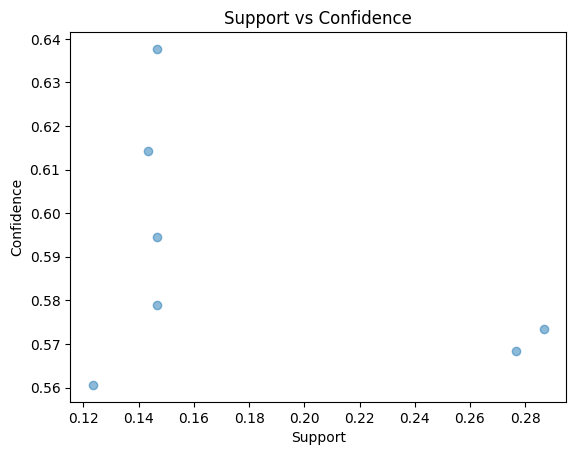

In [26]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [27]:
# prompt: calculate lift

# Calculate lift and print the rules with lift
rules["lift"] = rules["confidence"]/rules["support"]
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Paracetamol),(Ibuprofen),0.500000,0.536667,0.286667,0.573333,2.000000,1.0,0.018333,1.085938,0.127907,0.382222,0.079137,0.553747
1,(Cotrimoxazole),(Ibuprofen),0.486667,0.536667,0.276667,0.568493,2.054795,1.0,0.015489,1.073757,0.109060,0.370536,0.068690,0.542011
2,"(Ibuprofen, Amoxicillin)",(Paracetamol),0.253333,0.500000,0.146667,0.578947,3.947368,1.0,0.020000,1.187500,0.182630,0.241758,0.157895,0.436140
3,"(Paracetamol, Amoxicillin)",(Ibuprofen),0.230000,0.536667,0.146667,0.637681,4.347826,1.0,0.023233,1.278800,0.205726,0.236559,0.218017,0.455487
4,"(Amoxicillin, Cotrimoxazole)",(Metronidazole),0.220000,0.493333,0.123333,0.560606,4.545455,1.0,0.014800,1.153103,0.153846,0.209040,0.132775,0.405303
5,"(Paracetamol, Cotrimoxazole)",(Ibuprofen),0.246667,0.536667,0.146667,0.594595,4.054054,1.0,0.014289,1.142889,0.129324,0.230366,0.125024,0.433943
6,"(Metronidazole, Cotrimoxazole)",(Ibuprofen),0.233333,0.536667,0.143333,0.614286,4.285714,1.0,0.018111,1.201235,0.164813,0.228723,0.167523,0.440683


In [28]:
# prompt: calculate support

# Assuming 'rules' DataFrame from the previous code is available

# Calculate support and print the rules with support
print(rules[['antecedents', 'consequents', 'support']])


                      antecedents      consequents   support
0                   (Paracetamol)      (Ibuprofen)  0.286667
1                 (Cotrimoxazole)      (Ibuprofen)  0.276667
2        (Ibuprofen, Amoxicillin)    (Paracetamol)  0.146667
3      (Paracetamol, Amoxicillin)      (Ibuprofen)  0.146667
4    (Amoxicillin, Cotrimoxazole)  (Metronidazole)  0.123333
5    (Paracetamol, Cotrimoxazole)      (Ibuprofen)  0.146667
6  (Metronidazole, Cotrimoxazole)      (Ibuprofen)  0.143333


In [29]:
# prompt: calculate confidence

# Assuming 'rules' DataFrame from the previous code is available

# Calculate confidence and print the rules with confidence
print(rules[['antecedents', 'consequents', 'confidence']])


                      antecedents      consequents  confidence
0                   (Paracetamol)      (Ibuprofen)    0.573333
1                 (Cotrimoxazole)      (Ibuprofen)    0.568493
2        (Ibuprofen, Amoxicillin)    (Paracetamol)    0.578947
3      (Paracetamol, Amoxicillin)      (Ibuprofen)    0.637681
4    (Amoxicillin, Cotrimoxazole)  (Metronidazole)    0.560606
5    (Paracetamol, Cotrimoxazole)      (Ibuprofen)    0.594595
6  (Metronidazole, Cotrimoxazole)      (Ibuprofen)    0.614286


                      antecedents      consequents      lift
0                   (Paracetamol)      (Ibuprofen)  2.000000
1                 (Cotrimoxazole)      (Ibuprofen)  2.054795
2        (Ibuprofen, Amoxicillin)    (Paracetamol)  3.947368
3      (Paracetamol, Amoxicillin)      (Ibuprofen)  4.347826
4    (Amoxicillin, Cotrimoxazole)  (Metronidazole)  4.545455
5    (Paracetamol, Cotrimoxazole)      (Ibuprofen)  4.054054
6  (Metronidazole, Cotrimoxazole)      (Ibuprofen)  4.285714


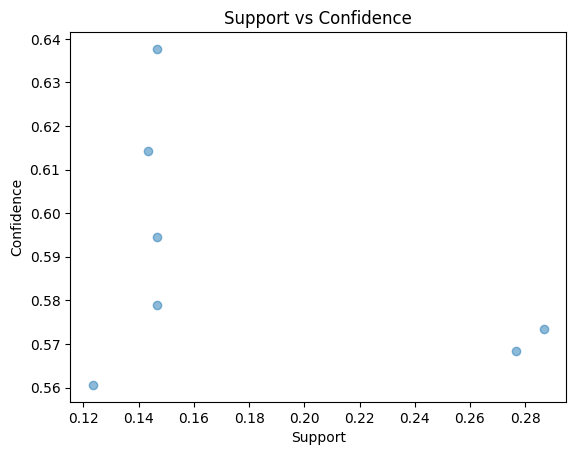

In [30]:
# prompt: display a graph for these rules

import matplotlib.pyplot as plt
# Assuming 'rules' DataFrame from the previous code is available

# Calculate lift and print the rules with lift
rules["lift"] = rules["confidence"]/rules["support"]
print(rules[['antecedents', 'consequents', 'lift']])

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()
